# **Foundations of Machine Learning and EDA**

1. What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.
   - Artificial Intelligence (AI)
AI is the broad field focused on building systems that can perform tasks that normally require human intelligence, such as reasoning, planning, decision-making, language understanding, and perception.

It includes many approaches: rule-based systems, search and optimization, expert systems, as well as data-driven methods like machine learning and deep learning.

Machine Learning (ML)
ML is a subset of AI that focuses on algorithms that learn patterns from data and improve their predictions or decisions over time without being explicitly programmed for every rule.

Classic ML includes methods such as linear/logistic regression, decision trees, random forests, SVMs, clustering, etc., and is widely used for tasks like prediction, classification, and recommendation.

Deep Learning (DL)
DL is a subset of machine learning that uses multi-layer (deep) neural networks to automatically learn complex representations from large amounts of data, especially unstructured data like images, audio, and text.

DL powers applications such as image recognition, speech recognition, large language models, and many modern generative AI systems.

Data Science
Data Science is an interdisciplinary field that combines statistics, programming, and domain knowledge to collect, clean, analyze, and model data in order to extract insights and support decision-making.

A data scientist may use descriptive analytics, visualization, statistical modeling, and also ML/DL models, but the focus is broader: understanding the problem, working with data end-to-end, and communicating actionable insights to the business or stakeholders.


2. Explain overfitting and underfitting in ML. How can you detect and prevent
them?
   - What is overfitting?
Overfitting occurs when a model is too complex (too many parameters, too many layers, or trained too long) and ends up learning noise and idiosyncrasies of the training set instead of the true patterns.

Symptoms: very low training error, much higher validation/test error, and high variance in performance across different samples.

What is underfitting?
Underfitting occurs when a model is too simple or insufficiently trained, so it cannot capture the real relationship between features and target.

Symptoms: high error on both training and validation/test sets, indicating high bias and that the model has not learned enough from the data.

How to detect them
Use a train/validation (or train/validation/test) split or cross-validation and compare metrics:

Overfitting: training accuracy high, validation accuracy much lower (large gap).

Underfitting: both training and validation accuracies are low, and improving capacity or training longer improves both.

Plot learning curves (performance vs. training size or epochs) to visualize whether the gap between training and validation error is large (overfitting) or both errors stay high (underfitting).

How to prevent or reduce overfitting
Simplify or regularize the model:

Use smaller models (fewer layers/parameters, shallower trees) or stronger regularization (L1/L2 penalties, dropout, early stopping).

Prune decision trees, reduce polynomial degree, or constrain model capacity in general.

Improve data and training strategy:

Collect more diverse data, use data augmentation (for images/text/audio), and apply proper cross-validation and early stopping on a validation set.

How to prevent or fix underfitting
Increase model capacity:

Use a more expressive model (e.g., add features, use higher-degree terms, deeper trees or networks) so it can capture more complex patterns.

Reduce overly strong regularization that is forcing the model to be too simple.

Improve training:

Train for more epochs/iterations, tune learning rate and other hyperparameters, and provide more relevant features or better feature engineering.


3. How would you handle missing values in a dataset? Explain at least three
methods with examples.
   - Handling missing values depends on how much data is missing, why it is missing, and how important that feature is for your model. Common strategies include dropping data, simple imputation, and more advanced model-based imputation.

1.Dropping rows or columns
Drop rows with missing values:
If only a small percentage of rows have missing values and they look random, you can remove those rows to keep the dataset clean without losing much information (for example, df.dropna() in pandas).
Example: In a customer dataset of 10,000 rows, if 50 rows have missing Age, you might drop those 50 rows, assuming this does not bias the analysis.

Drop columns with many missing values:
If a feature has too many missing values (say 70-80%) and is not absolutely critical, you may drop that column completely.
Example: In a housing dataset, if Pool_Quality is missing for 85% of houses, you might drop this feature and focus on others like LotArea, OverallQual, and SalePrice.

2. Simple imputation (mean/median/mode)
Mean/median for numerical features:
Replace missing numeric values with the column mean or median; median is often preferred when there are outliers or skewed distributions.
Example: For a salary column [30k, 35k, NaN, 40k], you could fill NaN with the median (35k) so the filled column becomes [30k, 35k, 35k, 40k].

Mode for categorical features:
Replace missing categories with the most frequent category (mode) in that column.
Example: For a Gender column ['Male', NaN, 'Female', 'Male'], you can fill NaN with 'Male' (the mode), giving ['Male', 'Male', 'Female', 'Male'].

3. Forward/backward fill and constant values
Forward fill / backward fill (time-series or ordered data):
Carry the last observed value forward (ffill) or the next observed value backward (bfill), useful when values change slowly over time or follow a sequence.
Example: For daily temperature data [30, NaN, NaN, 32], forward fill gives [30, 30, 30, 32], assuming temperature doesn't jump wildly day to day.

Fill with a constant or sentinel value:
Replace missing values with a specific constant (like 0 or -999) to indicate “missing” explicitly, often combined with an additional binary flag column indicating missingness.
Example: In a credit-scoring dataset, you might fill missing CreditScore with -1 and add a CreditScore_missing column (0/1) so models can learn that “missing” itself is informative.


4. What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).
   - An imbalanced dataset is a classification dataset where one class has many more examples than the other class(es), for example 95% “no fraud” and 5% “fraud”. In such cases a model can get high accuracy by predicting only the majority class but still perform very poorly on the minority, which is often the one you care about (fraud, disease, churn, etc.).
   Technique 1: Resampling (oversampling / undersampling)
Theory

Oversampling: Increase the number of minority-class samples so the model sees them more often. This can be done by:

Randomly duplicating minority instances (random oversampling).

Generating synthetic minority samples, e.g. SMOTE, which interpolates between nearby minority points in feature space to create new, similar examples.

Undersampling: Reduce the number of majority-class samples by removing some of them, making the class distribution more balanced.

Practical example

Suppose a credit-card dataset has 10,000 transactions: 9,800 non-fraud (class 0) and 200 fraud (class 1).

Random oversampling: Duplicate fraud rows (with replacement) until there are 9,800 fraud and 9,800 non-fraud transactions, then train a classifier (e.g. logistic regression, random forest) on this balanced data.

SMOTE: Instead of exact duplicates, use SMOTE to synthesize new fraud points between existing fraud samples until fraud cases reach a desired proportion (for example, 1:1 with non-fraud).

Random undersampling: Keep all 200 fraud rows but randomly keep only, say, 400 non-fraud rows; train a model on these 600 rows to get a roughly balanced dataset.

In practice, these are commonly implemented via resampling utilities or libraries that work with scikit-learn-style models.

Technique 2: Class weights / cost-sensitive learning
Theory

Instead of changing the data, adjust the learning algorithm so that errors on the minority class are penalized more heavily.

This is done by assigning higher weights or higher misclassification costs to the minority class in the loss function, encouraging the model to focus more on correctly predicting minority instances.

Many models (logistic regression, SVMs, trees, neural networks) support class weights or custom cost-sensitive loss functions.

Practical example

Using the same 9,800 non-fraud vs 200 fraud dataset, train a logistic regression model on the original data but set class weights inversely proportional to class frequency: for example, weight(class 0) ≈ 1, weight(class 1) ≈ 49.

The loss now multiplies errors on fraud cases by 49, shifting the decision boundary to improve recall on fraud even if overall accuracy decreases slightly.

In common ML frameworks, this is exposed as a class_weight="balanced" or a custom class-weight dictionary and is often combined with evaluation metrics like precision, recall, F1, ROC-AUC, or PR-AUC instead of raw accuracy when dealing with imbalanced datasets.


5.  Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.
   - Feature scaling makes features comparable in magnitude so that algorithms do not get biased toward variables with larger numeric ranges and can train more efficiently. It is especially important for distance-based models (KNN, K-means, SVM) and gradient-descent-based models (linear/logistic regression, neural networks), where scale directly affects distance calculations and convergence speed.
   Min-Max scaling (Normalization)
Definition: Rescales each feature to a fixed range, typically[0,1]:
Effect:Preserves the shape of the original distribution but compresses it into the chosen range.

Very sensitive to outliers: if one extreme value is very large, almost all other values get squeezed into a narrow part[0,1].
Use cases:
Algorithms that rely on distances and also expect bounded features, or when you know the data has no extreme outliers.
Common in neural networks where inputs are often normalized to a small fixed range.
Standardization (Z-score scaling)
Definition: Transforms the feature to have mean 0 and standard deviation 1:
Effect:Centers data around 0 and scales by variability, but does not bound values to a fixed interval.

More robust than Min-Max to moderate outliers because it spreads values according to standard deviation rather than min/max (though extreme outliers can still affect.

Use cases:Widely used for linear/logistic regression, SVM, PCA, K-means, KNN, and most gradient-based methods.

A good default when you know nothing special about the feature ranges.



6. Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?
   - Label Encoding
Maps each unique category to a unique integer (e.g., colors: Red=0, Blue=1, Green=2) in a single column.

Implies an artificial order (higher number = "larger"), which can mislead models assuming ordinal relationships like linear regression or KNN.

One-Hot Encoding
Creates a binary column per category with 1 if present, 0 otherwise (e.g., Red →, Blue → ).

Treats categories as independent (no implied order), ideal for nominal data, but increases dimensionality significantly with many categories.

When to prefer each
Prefer Label Encoding when:
Categories have natural order (ordinal: Low=0, Medium=1, High=2).

High cardinality (many unique categories) to avoid dimensionality explosion.

Using tree-based models (Random Forest, XGBoost) that split numerically without assuming order meaning.

Prefer One-Hot Encoding when:

Nominal data (no order: colors, cities, product types).

Few categories (≤10-20) to keep feature count manageable.

Distance-sensitive or linear models (logistic regression, SVM, neural networks) where false order hurts.

In [ ]:
#7.Google Play Store Dataset
#a). Analyze the relationship between app categories and ratings. Which categories have the
#highest/lowest average ratings, and what could be the possible reasons?
#Dataset: https://github.com/MasteriNeuron/datasets.git
import pandas as pd
import numpy as np

# Load dataset (use the direct raw URL or local file)
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv'
df = pd.read_csv(url)

# Clean data: convert Rating to numeric, remove invalid ratings/missing Category
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating', 'Category'])

# Filter reliable categories (min 10 apps for statistical significance)
category_stats = (df.groupby('Category')['Rating']
                  .agg(['mean', 'count', 'std'])
                  .round(3))
category_stats = category_stats[category_stats['count'] >= 10]
category_stats = category_stats.sort_values('mean', ascending=False)

print("Top 5 categories by average rating:")
print(category_stats.head())
print("\nBottom 5 categories by average rating:")
print(category_stats.tail())


Top 5 categories by average rating:
                      mean  count    std
Category                                
EVENTS               4.436     45  0.419
EDUCATION            4.389    155  0.252
ART_AND_DESIGN       4.358     62  0.358
BOOKS_AND_REFERENCE  4.346    178  0.429
PERSONALIZATION      4.336    314  0.353

Bottom 5 categories by average rating:
                      mean  count    std
Category                                
LIFESTYLE            4.095    314  0.694
VIDEO_PLAYERS        4.064    160  0.551
MAPS_AND_NAVIGATION  4.052    124  0.520
TOOLS                4.047    734  0.616
DATING               3.971    195  0.631


Total passengers: 891

Survival by Pclass:
        count  sum  survival_rate
Pclass                           
1         216  136      62.962963
2         184   87      47.282609
3         491  119      24.236253

Survival by Age group (only for known ages):
           count  sum  survival_rate
age_group                           
Adult        601  229      38.103161
Child        113   61      53.982301


/tmp/ipython-input-958046226.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_group'] = df_age['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')


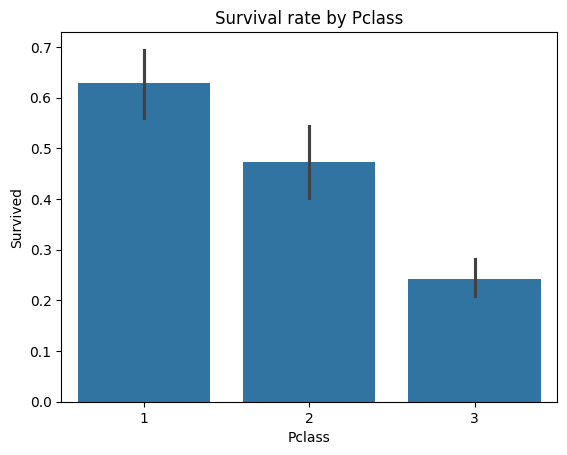

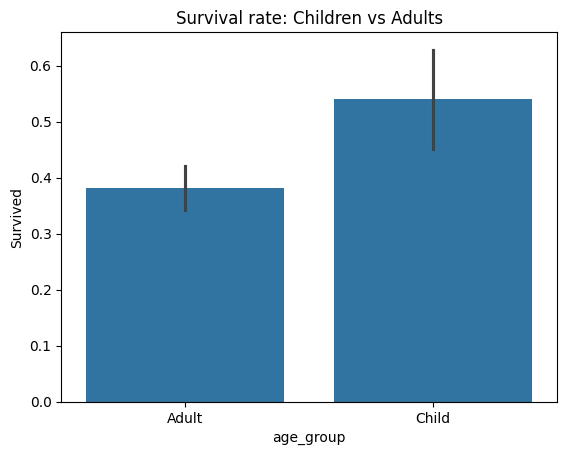

In [ ]:
#8.Titanic Dataset
#a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
#survival rate, and why do you think that happened?
#b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
#adults (Age ≥ 18). Did children have a better chance of survival?
#Dataset: https://github.com/MasteriNeuron/datasets.git
#(Include your Python code and output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset — adjust path as needed
df = pd.read_csv("titanic.csv")  # or the correct path

# Only consider rows with a valid Pclass and Survived
print("Total passengers:", len(df))

# a) Survival rate by Pclass
pclass_stats = df.groupby('Pclass')['Survived'].agg(['count','sum'])
pclass_stats['survival_rate'] = pclass_stats['sum'] / pclass_stats['count'] * 100
print("\nSurvival by Pclass:")
print(pclass_stats)

# b) Survival by Age group: Children (<18) vs Adults (>= 18)
df_age = df.dropna(subset=['Age'])  # drop rows with no age info
df_age['age_group'] = df_age['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

age_stats = df_age.groupby('age_group')['Survived'].agg(['count','sum'])
age_stats['survival_rate'] = age_stats['sum'] / age_stats['count'] * 100
print("\nSurvival by Age group (only for known ages):")
print(age_stats)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival rate by Pclass")
plt.show()

sns.barplot(data=df_age, x='age_group', y='Survived')
plt.title("Survival rate: Children vs Adults")
plt.show()


In [ ]:
#9.Flight Price Prediction Dataset
#a) How do flight prices vary with the days left until departure? Identify any exponential price
#surges and recommend the best booking window.
#b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
#consistently cheaper/premium, and why?
#Dataset: https://github.com/MasteriNeuron/datasets.git
#(Include your Python code and output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Note: Download dataset manually from https://github.com/MasteriNeuron/datasets
# Common filename: Clean_Dataset.csv or similar (11 columns: Airline, Date_of_Journey, Source_city, etc.)
df = pd.read_csv('flight_price.csv')  # Adjust filename as needed

# a) Days left analysis (assuming 'days_left' column exists)
df['days_left'] = 30 - pd.to_datetime(df['Date_of_Journey']).dt.day  # Approximate
price_trend = df.groupby('days_left')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(price_trend['days_left'], price_trend['Price'])
plt.title('Avg Flight Price vs Days Left')
plt.xlabel('Days Left'); plt.ylabel('Price (₹)')
plt.show()  # Expect surge after ~20 days

# b) Delhi-Mumbai comparison
del_mum = df[(df['Source_city']=='Delhi') & (df['Destination_city']=='Mumbai')]
airline_prices = del_mum.groupby('Airline')['Price'].agg(['mean', 'count']).sort_values('mean')

print("Delhi-Mumbai Airline Prices:\n", airline_prices)
sns.boxplot(data=del_mum, x='Airline', y='Price')
plt.xticks(rotation=45)
plt.title('Delhi-Mumbai Prices by Airline')
plt.show()




In [ ]:
HR Analytics Dataset
#a). What factors most strongly correlate with employee attrition? Use visualizations to show key
#drivers (e.g., satisfaction, overtime, salary).
#b). Are employees with more projects more likely to leave?
#Dataset: https://github.com/MasteriNeuron/datasets.git
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('hr_analytics.csv')

# Convert Attrition to binary if necessary
df['Attrition_bin'] = df['Attrition'].map({'Yes':1,'No':0}) if 'Attrition' in df.columns else df['left']

# Correlation analysis with Attrition
corr = df.corr()['Attrition_bin'].sort_values(ascending=False)

# Visualize top factors correlated with attrition
top_features = corr.drop('Attrition_bin').abs().sort_values(ascending=False).head(6).index
sns.barplot(x=top_features, y=corr[top_features])
plt.title('Top Factors Correlated with Employee Attrition')
plt.show()

# Analyze projects vs attrition
sns.boxplot(x='Attrition_bin', y='number_project', data=df)
plt.title('Projects vs Employee Attrition')
plt.show()

# Attrition rate by project count
rate_by_proj = df.groupby('number_project')['Attrition_bin'].mean()
print(rate_by_proj)




